In [1]:
import pandas as pd

C:\Users\CSC\AppData\Local\Temp\ipykernel_29792\2633967086.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid
C:\Users\CSC\AppData\Local\Temp\ipykernel_29792\2633967086.py:43: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  selected_gdf.centroid.plot(ax=ax, color='blue', markersize=10)


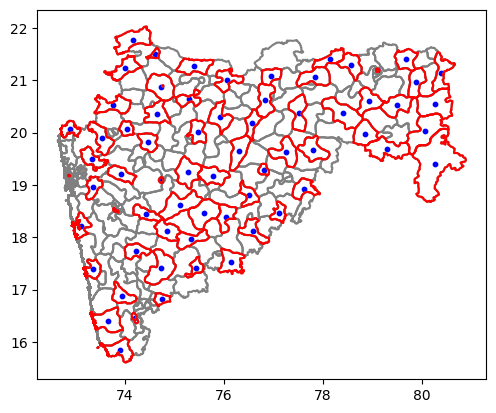

In [2]:
import geopandas as gpd
from shapely.geometry import Point
import random
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

# Load the shapefile
shapefile_path = r'C:\Users\CSC\Downloads\maharashtra\maharashtra.assembly.shp'
gdf = gpd.read_file(shapefile_path)

# Calculate centroids of each AC
gdf['centroid'] = gdf.geometry.centroid

# Function to select maximally separated ACs
def select_maximally_separated_ac(gdf, num_ac):
    # Initialize selected ACs with a random one
    selected_indices = [random.randint(0, len(gdf) - 1)]
    selected_centroids = [gdf.iloc[selected_indices[-1]].centroid]

    while len(selected_indices) < num_ac:
        max_dist = 0
        max_index = -1
        for i in range(len(gdf)):
            if i not in selected_indices:
                min_dist = min([selected_centroids[j].distance(gdf.iloc[i].centroid) for j in range(len(selected_centroids))])
                if min_dist > max_dist:
                    max_dist = min_dist
                    max_index = i
        selected_indices.append(max_index)
        selected_centroids.append(gdf.iloc[max_index].centroid)
    
    return selected_indices

# Select 67 maximally separated ACs
num_ac = 67
selected_indices = select_maximally_separated_ac(gdf, num_ac)
selected_gdf = gdf.iloc[selected_indices]

# Visualize the result
fig, ax = plt.subplots()
gdf.boundary.plot(ax=ax, color='grey')
selected_gdf.boundary.plot(ax=ax, color='red')
selected_gdf.centroid.plot(ax=ax, color='blue', markersize=10)
plt.show()


In [5]:
gdf

,state,pc,pc_name,ac,ac_name,geometry,centroid
0,Maharashtra,1,Nandurbar,1,Akkalkuwa,"POLYGON ((74.55620 21.71263, 74.55620 21.71262...",POINT (74.16487 21.77445)
1,Maharashtra,1,Nandurbar,2,Shahada,"POLYGON ((74.64545 21.65574, 74.64545 21.65437...",POINT (74.36851 21.52293)
2,Maharashtra,1,Nandurbar,3,Nandurbar,"POLYGON ((74.44595 21.44600, 74.44595 21.44612...",POINT (74.61177 21.50076)
3,Maharashtra,1,Nandurbar,4,Nawapur,"POLYGON ((73.85405 20.99900, 73.85377 20.99911...",POINT (74.00731 21.22952)
4,Maharashtra,1,Nandurbar,5,Sakri,"POLYGON ((73.93966 20.79683, 73.94115 20.80378...",POINT (74.19736 20.99459)
...,...,...,...,...,...,...,...
283,Maharashtra,48,Hatkanangle,284,Shirala,"POLYGON ((73.98870 17.15625, 73.98870 17.15612...",POINT (73.98572 17.20435)
284,Maharashtra,44,Sangli,285,Palus-Kadegaon,"POLYGON ((74.25695 17.41700, 74.25707 17.41700...",POINT (74.37128 17.22229)
285,Maharashtra,44,Sangli,286,Khanapur,"POLYGON ((74.79845 17.65550, 74.79857 17.65550...",POINT (74.73016 17.40229)
286,Maharashtra,44,Sangli,287,Tasgaon-Kavathe Mahankal,"POLYGON ((74.87295 17.20750, 74.87295 17.20737...",POINT (74.78861 17.04033)


In [9]:
import geopandas as gpd
import random
import pandas as pd

# Load the shapefile
shapefile_path = r'C:\Users\CSC\Downloads\maharashtra\maharashtra.assembly.shp'
gdf = gpd.read_file(shapefile_path)

# Calculate centroids of each AC
gdf['centroid'] = gdf.geometry.centroid

# Function to select maximally separated ACs
def select_maximally_separated_ac(gdf, num_ac):
    # Initialize selected ACs with a random one
    selected_indices = [random.randint(0, len(gdf) - 1)]
    selected_centroids = [gdf.iloc[selected_indices[-1]].centroid]

    while len(selected_indices) < num_ac:
        max_dist = 0
        max_index = -1
        for i in range(len(gdf)):
            if i not in selected_indices:
                min_dist = min([selected_centroids[j].distance(gdf.iloc[i].centroid) for j in range(len(selected_centroids))])
                if min_dist > max_dist:
                    max_dist = min_dist
                    max_index = i
        selected_indices.append(max_index)
        selected_centroids.append(gdf.iloc[max_index].centroid)
    
    return selected_indices

# Select 67 maximally separated ACs
num_ac = 67
selected_indices = select_maximally_separated_ac(gdf, num_ac)
selected_gdf = gdf.iloc[selected_indices]

# Get the list of selected ACs
selected_ac_list = selected_gdf[['ac_name', 'centroid']].reset_index()

print(selected_ac_list)


C:\Users\CSC\AppData\Local\Temp\ipykernel_29792\1156962428.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid


    index         ac_name                   centroid
0      23   Sindkhed Raja  POINT (76.24592 20.05369)
1     269      Sawantwadi  POINT (73.90746 15.84372)
2      65          Amgaon  POINT (80.39732 21.14059)
3     160         Charkop  POINT (72.82903 19.20837)
4       0       Akkalkuwa  POINT (74.16487 21.77445)
..    ...             ...                        ...
62     31      Murtizapur  POINT (77.27581 20.64696)
63    114  Malegaon outer  POINT (74.50120 20.64983)
64    254         Phaltan  POINT (74.38805 17.94391)
65     78          Digras  POINT (77.79097 20.30193)
66     87            Loha  POINT (77.18359 18.92969)

[67 rows x 3 columns]


In [15]:
selected_ac_list


,index,ac_name,centroid
0,23,Sindkhed Raja,POINT (76.24592 20.05369)
1,269,Sawantwadi,POINT (73.90746 15.84372)
2,65,Amgaon,POINT (80.39732 21.14059)
3,160,Charkop,POINT (72.82903 19.20837)
4,0,Akkalkuwa,POINT (74.16487 21.77445)
...,...,...,...
62,31,Murtizapur,POINT (77.27581 20.64696)
63,114,Malegaon outer,POINT (74.50120 20.64983)
64,254,Phaltan,POINT (74.38805 17.94391)
65,78,Digras,POINT (77.79097 20.30193)


C:\Users\CSC\AppData\Local\Temp\ipykernel_29792\2238689645.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  selected_gdf.centroid.plot(ax=ax, color='blue', markersize=10)


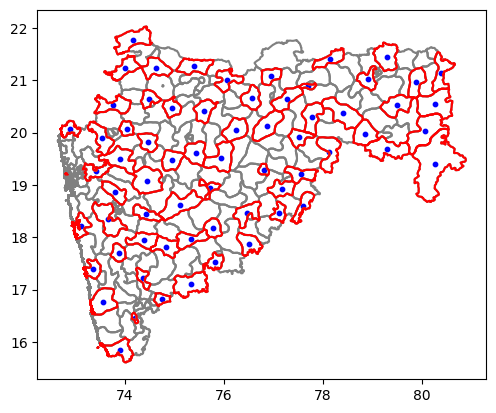

In [10]:
fig, ax = plt.subplots()
gdf.boundary.plot(ax=ax, color='grey')
selected_gdf.boundary.plot(ax=ax, color='red')
selected_gdf.centroid.plot(ax=ax, color='blue', markersize=10)
plt.show()

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from shapely.geometry import Polygon

# Load the shapefile
shapefile_path = r'C:\Users\CSC\Downloads\maharashtra\maharashtra.assembly.shp'
gdf = gpd.read_file(shapefile_path)

# Reproject to a suitable projected CRS (e.g., UTM zone 43N)
gdf = gdf.to_crs(epsg=32643)  # Example EPSG code for UTM zone 43N

# Calculate centroids of each AC
gdf['centroid'] = gdf.geometry.centroid
gdf['centroid_x'] = gdf['centroid'].x
gdf['centroid_y'] = gdf['centroid'].y

# Prepare data for clustering
X = gdf[['centroid_x', 'centroid_y']].values

# Perform K-means clustering with a larger number of clusters
num_clusters = 150
kmeans = KMeans(n_clusters=num_clusters, n_init=20, random_state=42)
gdf['cluster'] = kmeans.fit_predict(X)

# Function to ensure non-adjacency
def ensure_non_adjacent_ac(gdf, num_desired):
    # Start with all ACs and an empty selection
    selected_ac = []
    remaining_ac = gdf.copy()
    
    while len(selected_ac) < num_desired:
        max_distance = -1
        best_ac = None
        
        for idx, row in remaining_ac.iterrows():
            # Calculate distance to the nearest selected AC
            if len(selected_ac) == 0:
                distance = float('inf')  # No previous selection
            else:
                distances = [selected_ac_ac.geometry.distance(row['geometry']) for selected_ac_ac in selected_ac]
                distance = min(distances)
            
            if distance > max_distance:
                max_distance = distance
                best_ac = row
        
        # Append the best AC to the selection and remove it from the remaining list
        selected_ac.append(best_ac)
        remaining_ac = remaining_ac.drop(best_ac.name)
    
    return pd.DataFrame(selected_ac)

# Select non-adjacent ACs
selected_ac_df = ensure_non_adjacent_ac(gdf, num_desired=74)

# Convert to GeoDataFrame
selected_ac_gdf = gpd.GeoDataFrame(selected_ac_df, geometry='geometry', crs=gdf.crs)

# Optional: Visualize the results
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='grey', edgecolor='k', alpha=0.5)
selected_ac_gdf.plot(ax=ax, color='red', edgecolor='k', markersize=50)  # Using markersize for points
plt.title('Selected ACs with Non-Adjacent Constraint')
plt.show()


In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# Load the shapefile
shapefile_path = r'C:\Users\CSC\Downloads\maharashtra\maharashtra.assembly.shp'
gdf = gpd.read_file(shapefile_path)

# Ensure data is in a projected CRS for distance calculations
gdf = gdf.to_crs(epsg=4326)  # Replace with appropriate CRS if needed

# Function to find distances between ACs
def calculate_distance(ac1, ac2):
    return ac1.geometry.distance(ac2.geometry)

# Function to check adjacency
def are_adjacent(ac1, ac2):
    return ac1.geometry.touches(ac2.geometry)

# Function to select ACs
def select_ac(gdf, num_selections):
    selected_ac = []
    
    # Randomly select the first AC
    first_ac = gdf.sample(1).iloc[0]
    selected_ac.append(first_ac)
    
    while len(selected_ac) < num_selections:
        max_distance = -1
        best_ac = None
        
        for _, ac in gdf.iterrows():
            if all(not are_adjacent(ac, sel_ac) for sel_ac in selected_ac):
                distance = min(calculate_distance(ac, sel_ac) for sel_ac in selected_ac)
                if distance > max_distance:
                    max_distance = distance
                    best_ac = ac
        
        if best_ac is not None:
            selected_ac.append(best_ac)
        else:
            break
    
    return gpd.GeoDataFrame(selected_ac)

# Select 74 ACs
num_selections = 74
selected_ac_gdf = select_ac(gdf, num_selections)

# Optional: Visualize the results
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='grey', edgecolor='k', alpha=0.5)
selected_ac_gdf.plot(ax=ax, color='red', edgecolor='k', markersize=50)
plt.title('Selected ACs')
plt.show()


In [13]:
selected_ac_df.to_excel(r'D:\NITISH\Maharastra_AC Selection\67_ac_Maharastra.xlsx')

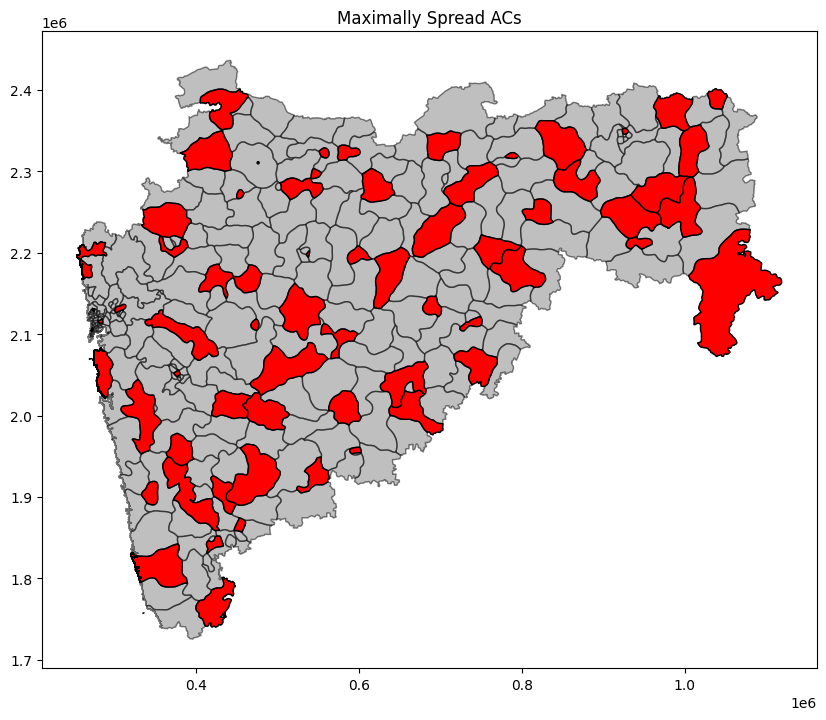

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

# Load the shapefile
shapefile_path = r'C:\Users\CSC\Downloads\maharashtra\maharashtra.assembly.shp'
gdf = gpd.read_file(shapefile_path)

# Reproject to a suitable projected CRS (e.g., UTM zone 43N)
gdf = gdf.to_crs(epsg=32643)  # Example EPSG code for UTM zone 43N

# Calculate centroids of each AC
gdf['centroid'] = gdf.geometry.centroid
gdf['centroid_x'] = gdf['centroid'].x
gdf['centroid_y'] = gdf['centroid'].y

# Prepare data for clustering
X = gdf[['centroid_x', 'centroid_y']].values

# Perform K-means clustering
num_clusters = 74
kmeans = KMeans(n_clusters=num_clusters, n_init=20, random_state=42)  # Explicitly set n_init
gdf['cluster'] = kmeans.fit_predict(X)

# Get cluster centroids
cluster_centroids = kmeans.cluster_centers_

# Function to find the closest point to the cluster centroid
def find_closest_point(cluster_df, centroid):
    distances = np.sqrt((cluster_df['centroid_x'] - centroid[0])**2 + (cluster_df['centroid_y'] - centroid[1])**2)
    return cluster_df.iloc[np.argmin(distances)]

# Select the nearest AC from each cluster
initial_ac_list = []
for cluster_id in range(num_clusters):
    cluster_df = gdf[gdf['cluster'] == cluster_id]
    closest_ac = find_closest_point(cluster_df, cluster_centroids[cluster_id])
    initial_ac_list.append(closest_ac)

# Convert to DataFrame
initial_ac_df = pd.DataFrame(initial_ac_list)

# Function to maximize separation of selected ACs
def maximize_separation(ac_df, num_selections):
    ac_list = ac_df.to_dict(orient='records')  # Convert DataFrame to list of dictionaries
    remaining_ac_list = ac_list.copy()
    selected_ac = [remaining_ac_list.pop(0)]
    
    while len(selected_ac) < num_selections:
        max_distance = -1
        best_ac = None
        for ac in remaining_ac_list:
            min_distance = min(np.sqrt((ac['centroid_x'] - sel['centroid_x'])**2 + (ac['centroid_y'] - sel['centroid_y'])**2) for sel in selected_ac)
            if min_distance > max_distance:
                max_distance = min_distance
                best_ac = ac
        selected_ac.append(best_ac)
        remaining_ac_list.remove(best_ac)
    
    return pd.DataFrame(selected_ac)

# Maximize separation
selected_ac_df = maximize_separation(initial_ac_df, num_clusters)

# Optional: Visualize the results
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='grey', edgecolor='k', alpha=0.5)
selected_ac_gdf = gpd.GeoDataFrame(selected_ac_df, geometry='geometry')
selected_ac_gdf.plot(ax=ax, color='red', edgecolor='k', markersize=50)  # Using markersize for points
plt.title('Maximally Spread ACs')
plt.show()


In [21]:
gdf 

,state,pc,pc_name,ac,ac_name,geometry,centroid,centroid_x,centroid_y,cluster
0,Maharashtra,1,Nandurbar,1,Akkalkuwa,"POLYGON ((454098.864 2401085.469, 454098.118 2...",POINT (413640.623 2408098.177),413640.623231,2.408098e+06,4
1,Maharashtra,1,Nandurbar,2,Shahada,"POLYGON ((463314.793 2394764.939, 463314.448 2...",POINT (434598.504 2380150.137),434598.503784,2.380150e+06,4
2,Maharashtra,1,Nandurbar,3,Nandurbar,"POLYGON ((442589.956 2371610.251, 442590.005 2...",POINT (459785.573 2377619.482),459785.573462,2.377619e+06,4
3,Maharashtra,1,Nandurbar,4,Nawapur,"POLYGON ((380895.602 2322463.611, 380866.754 2...",POINT (396970.134 2347870.898),396970.133504,2.347871e+06,47
4,Maharashtra,1,Nandurbar,5,Sakri,"POLYGON ((389646.441 2300025.350, 389806.749 2...",POINT (416573.938 2321757.248),416573.937817,2.321757e+06,47
...,...,...,...,...,...,...,...,...,...,...
283,Maharashtra,48,Hatkanangle,284,Shirala,"POLYGON ((392438.483 1897120.134, 392438.411 1...",POINT (392181.554 1902429.486),392181.554371,1.902429e+06,41
284,Maharashtra,44,Sangli,285,Palus-Kadegaon,"POLYGON ((421082.096 1925839.565, 421095.372 1...",POINT (433160.128 1904249.965),433160.128407,1.904250e+06,57
285,Maharashtra,44,Sangli,286,Khanapur,"POLYGON ((478621.881 1952083.256, 478635.139 1...",POINT (471329.168 1924067.804),471329.167594,1.924068e+06,36
286,Maharashtra,44,Sangli,287,Tasgaon-Kavathe Mahankal,"POLYGON ((486490.922 1902514.165, 486490.913 1...",POINT (477501.797 1884029.822),477501.796541,1.884030e+06,36
